In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

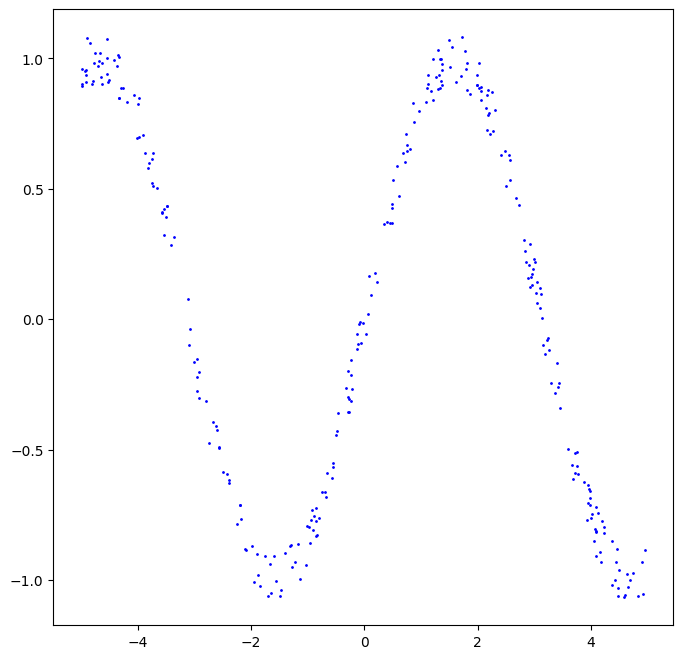

In [2]:
S = dataset.TrigonDataset()
S.sample(size=300, noise=0.1)
S.plot()

Fitness: -157.2237173845003


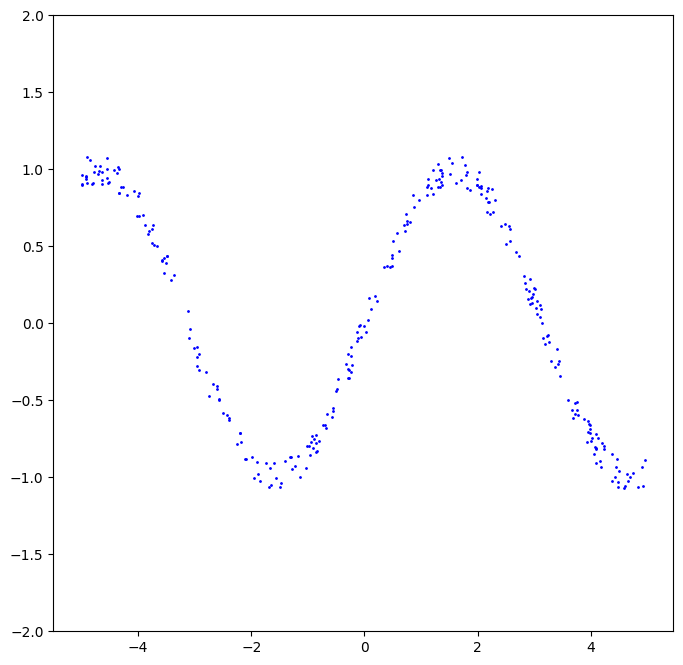

In [3]:
tspl = taylor_spline.TaylorSpline(0, 3)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()

In [4]:
"""tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

In [5]:
from matplotlib import pyplot as plt

tspline_conn = taylor_spline.TaylorSplineConnector()
tsplines = tspline_conn.fit(S, 4)

ExpRadius = 2.0
Fitting root on x0 = 0.0 to [-2.0, 2.0]
Fitting (to right) on x0 = 1.6 to [-0.3999999999999999, 3.6]
Fitting (to right) on x0 = 3.2 to [1.2000000000000002, 5.2]
Fitting (to right) on x0 = 4.800000000000001 to [2.8000000000000007, 6.800000000000001]
Fitting (to left) on x0 = -1.6 to [-3.6, 0.3999999999999999]
Fitting (to left) on x0 = -3.2 to [-5.2, -1.2000000000000002]
Fitting (to left) on x0 = -4.800000000000001 to [-6.800000000000001, -2.8000000000000007]


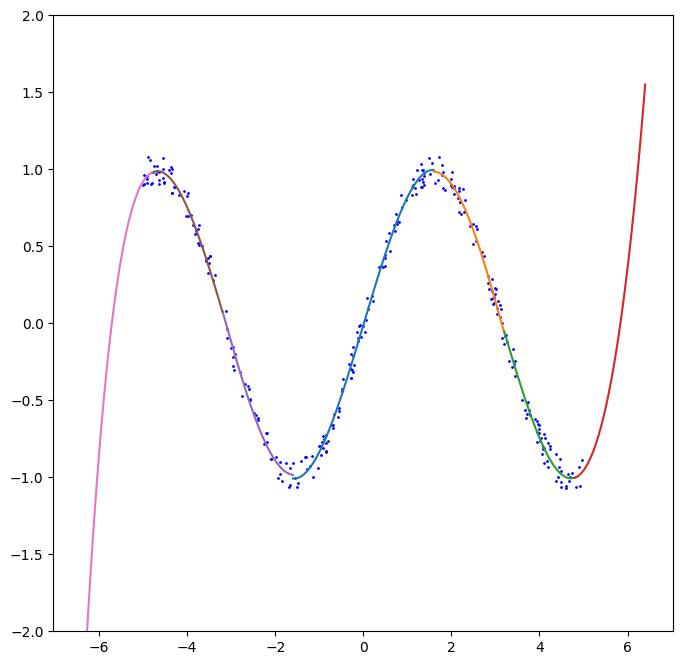

In [6]:
S.plot()
for ts in tsplines:
    #print(f"Fitness: {ts.fitness(S)}")
    ts.plot(show=False)
plt.show()

In [7]:
import taylor_spline
import dataset

S = dataset.TrigonDataset()
S.sample(size=300, noise=0.1)

tspline = taylor_spline.TaylorSpline(0., 3, -2, 2)
tspline_solver = taylor_spline.TaylorSplineSolver(tspline, S)
sol = tspline_solver.solve()
sol

Degree: 4; Unknowns: (d0, d1, d2, d3)
Generating equations...
Solving...


{d0: -0.00262554281980914,
 d1: 0.957547202408040,
 d2: -0.00201932524178094,
 d3: -0.777075506864243}

-0.402743908903957


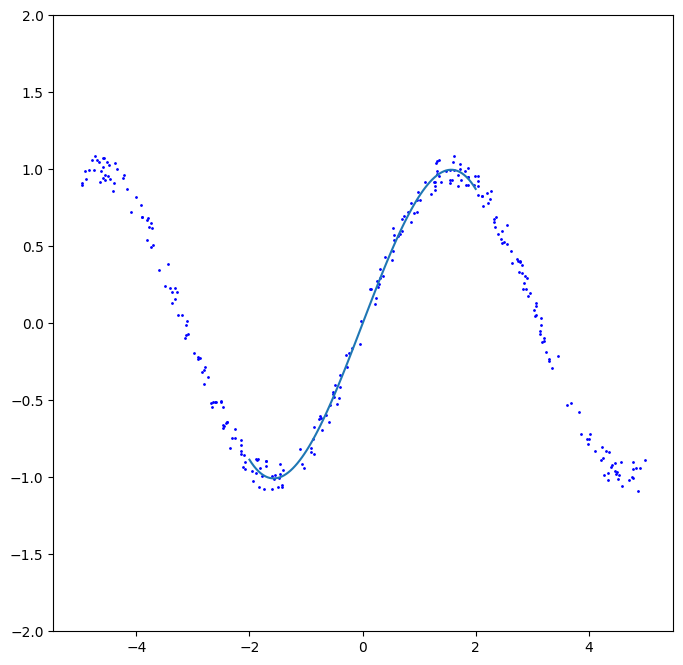

In [8]:
for d in sol.keys():
    order = int(str(d)[1])
    tspline.deriv[order] = sol[d]

S.plot()
print(tspline.fitness(S))
tspline.plot()